In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

# 网格划分

为了强调 Python 语言的列表是从零开始编号的，我们这一节也叫第0节。同时这是因为这一节介绍用第三方库生成有限元网格，并未涉及任何需要我们自编的内容。

在本节，我们利用 pygmsh 生成网格，并介绍网格的数据结构。

首先了解一下 pygmsh。pygmsh 是 Gmsh 前处理部分的 Python 版，而 Gmsh （见 http://www.gmsh.info/ ）是一个开源的内置了前后处理的有限元网格生成器，并且拥有图形界面。因为 Python 有诸如 matplotlib 之类的成熟的画图库，所以 pygmsh 没有选择包含后处理和显示功能。

In [2]:
import pygmsh

仿照 pygmsh 给出的示例代码，我们生成一个正方形区域的三角形网格（为了方便阅读，本文只生成较少的网格，这固然会影响结果的计算精度，但是划分更多网格的有限元分析的思路是一致的）：

In [3]:
with pygmsh.geo.Geometry() as geom:
    geom.add_polygon( # 定义几何形状
        # 几何形状
        [
            [0.0, 0.0],
            [1.0, 0.0],
            [1.0, 1.0],
            [0.0, 1.0],
        ],
        # 建议的网格尺寸
        mesh_size=0.5,
    )
    mesh = geom.generate_mesh() # 为几何形状生成网格

我们看一下生成的网格。暂时不需要理解下面代码的含义，我们将会在后处理绘图中介绍。

Text(0.5, 1.0, 'Mesh')

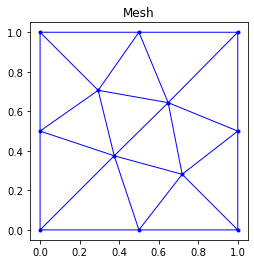

In [4]:
x=mesh.points.T[0]
y=mesh.points.T[1]
elements=mesh.cells_dict['triangle']
mesh_fig=tri.Triangulation(x,y,elements)
plt.figure()
plt.gca().set_aspect('equal')
plt.triplot(mesh_fig,'b.-',lw=1)
plt.title('Mesh')

下面我们学习有限元网格信息的记录方法。若一个区域被划分成三角形网格，我们分节点数据和网格数据对网格数据进行记录。

首先是节点数据，包含节点的编号和节点的位移。我们的网格包含如下节点（注意这里的节点是三维坐标记录的）：

In [5]:
mesh.points

array([[0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.5       , 0.        , 0.        ],
       [1.        , 0.5       , 0.        ],
       [0.5       , 1.        , 0.        ],
       [0.        , 0.5       , 0.        ],
       [0.29375   , 0.70625   , 0.        ],
       [0.375     , 0.375     , 0.        ],
       [0.64791667, 0.64375   , 0.        ],
       [0.71875   , 0.28125   , 0.        ]])

节点编号为可由索引列表给出

In [6]:
list(enumerate(mesh.points))

[(0, array([0., 0., 0.])),
 (1, array([1., 0., 0.])),
 (2, array([1., 1., 0.])),
 (3, array([0., 1., 0.])),
 (4, array([0.5, 0. , 0. ])),
 (5, array([1. , 0.5, 0. ])),
 (6, array([0.5, 1. , 0. ])),
 (7, array([0. , 0.5, 0. ])),
 (8, array([0.29375, 0.70625, 0.     ])),
 (9, array([0.375, 0.375, 0.   ])),
 (10, array([0.64791667, 0.64375   , 0.        ])),
 (11, array([0.71875, 0.28125, 0.     ]))]

其次是单元数据，由于节点位置已经由节点数据记录，单元只需记录单元包含的节点。pygmsh 生成的节点数据储存在 meshio 库的 Mesh 类中，为了涵盖丰富类型的节点，该库用字典形式储存了各类单元的数据。在本文中，我们只研究三角形网格，所以我们选择三角形单元：

In [7]:
mesh.cells_dict['triangle']

array([[ 5,  2, 10],
       [ 7,  0,  9],
       [ 0,  4,  9],
       [ 2,  6, 10],
       [ 4,  1, 11],
       [ 1,  5, 11],
       [ 6,  3,  8],
       [ 3,  7,  8],
       [ 5, 10, 11],
       [ 8,  7,  9],
       [ 8,  9, 10],
       [ 9,  4, 11],
       [10,  9, 11],
       [ 6,  8, 10]], dtype=uint64)

按索引列表展示单元：

In [8]:
list(enumerate(mesh.cells_dict['triangle']))

[(0, array([ 5,  2, 10], dtype=uint64)),
 (1, array([7, 0, 9], dtype=uint64)),
 (2, array([0, 4, 9], dtype=uint64)),
 (3, array([ 2,  6, 10], dtype=uint64)),
 (4, array([ 4,  1, 11], dtype=uint64)),
 (5, array([ 1,  5, 11], dtype=uint64)),
 (6, array([6, 3, 8], dtype=uint64)),
 (7, array([3, 7, 8], dtype=uint64)),
 (8, array([ 5, 10, 11], dtype=uint64)),
 (9, array([8, 7, 9], dtype=uint64)),
 (10, array([ 8,  9, 10], dtype=uint64)),
 (11, array([ 9,  4, 11], dtype=uint64)),
 (12, array([10,  9, 11], dtype=uint64)),
 (13, array([ 6,  8, 10], dtype=uint64))]